In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Used models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# to resample the data
from sklearn.utils import resample
# to standardize the data
from sklearn.preprocessing import StandardScaler
# Evaluation metrics
from sklearn.metrics import (accuracy_score, 
                             precision_score,
                             recall_score)

# To save and load the model
import joblib

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# replace with the path to the root project directory
%cd /content/drive/MyDrive/Colab_Notebooks/CLA_Stroke_Prediction

/content/drive/MyDrive/Colab_Notebooks/CLA_Stroke_Prediction


# **Data Exploration Analysis**

## **Loading the dataset**

In [7]:
DATA_PATH = './Dataset/'

In [8]:
data = pd.read_csv(DATA_PATH+'healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0




---


### **Observation**

- There are 5110 rows in the data
- There are 12 features (columns)
- The data contains binary, categorical and numerical columns
  - Binary columns : hypertension, heart_disease, stroke (target variable)
  - Categorical columns: ever_married, work_type, residance_type, smoking_status
  - Numerical columns: id, age, avg_glucose_level, bmi


---



## **Data Cleaning and Data Visualization :**

In [ ]:
print("*************************")
print("Features' Data Types ")
print("*************************")
print(data.info())

*************************
Features' Data Types 
*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


### **Unique Values Count**

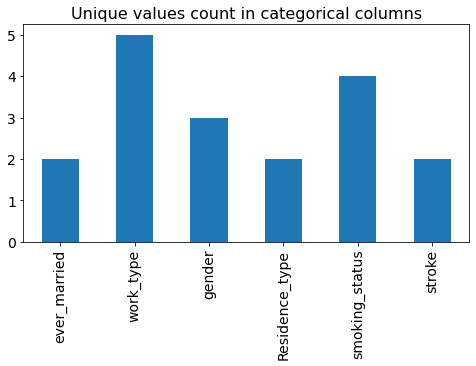

In [ ]:
data[["ever_married", "work_type", "gender" ,
           "Residence_type", "smoking_status",
           "stroke"]].nunique().plot.bar(
               figsize=(8,4), 
               fontsize= 14
               )
plt.title("Unique values count in categorical columns", fontsize=16)
plt.show()




---
The maximum number of unique values is 5 which is in the variable **work_type**, then we have 4 in the **smoking_status** variable, the rest of categorical variables have only two categories.

---




### **Frequency Count**

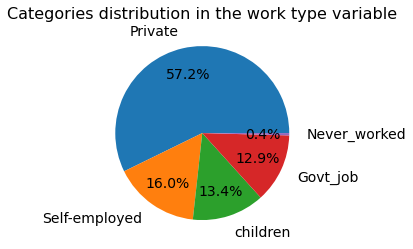

In [ ]:
data["work_type"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the work type variable", fontsize=16)
plt.show()

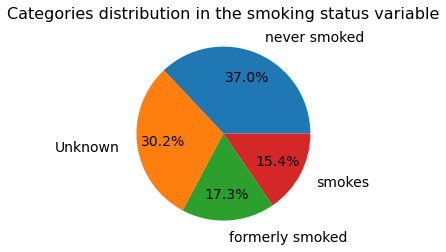

In [ ]:
data["smoking_status"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the smoking status variable", fontsize=16)
plt.show()

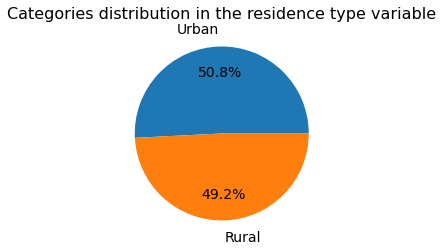

In [ ]:
data["Residence_type"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the residence type variable", fontsize=16)
plt.show()

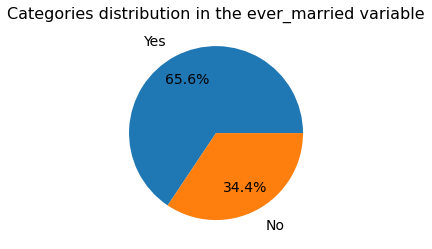

In [ ]:
data["ever_married"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the ever_married variable", fontsize=16)
plt.show()

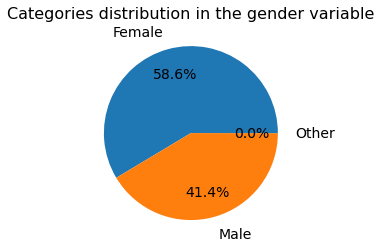

In [ ]:
data["gender"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the gender variable", fontsize=16)
plt.show()

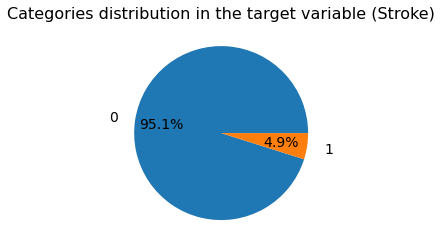

In [ ]:
data["stroke"].value_counts().plot.pie(autopct='%1.1f%%', 
                                               pctdistance=0.7, labeldistance=1.2,
                                               figsize=(8,4), fontsize= 14, 
                                               ylabel="")
plt.title("Categories distribution in the target variable (Stroke)", fontsize=16)
plt.show()

In [ ]:
#the number of null values in our dataset
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



---


### **Observations**
*  The column **bmi** has 201 missing value. We choose to fill them with the mean
*  The comlumn **id** is non relevant to the study. We choose to drop it.
*  The category **Unkwonwn** in the **smoking_status** variable has a high percentage (30%), thus wa can not alter it or drop its rows. In the next steps it would be considered as a another category as others.
*  Categorical columns needs to be changed to discret columns.
*  The labels are imbalanced, there is too much patients with no stroke than there is patients with stroke which can bias the model.


---




## **Data Cleaning**



### **1. Replacing null values with the mean**




In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
#print('No more null values')

data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
print(data['bmi'].describe())

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


**Observation**

Filling the missing values with the mean didn't alter dispersion parameters (mean, median, standard deviation ... )


### **2.   Droping useless columns**



Drop the id column

In [9]:
data.drop('id',axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0




### **3.   Variance analysis and removing Outliers**




In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


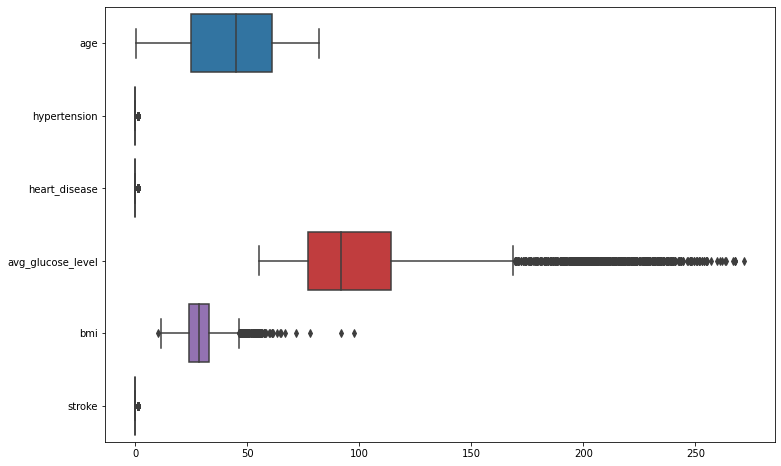

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,orient="h")

---

The variables **avg_glucose_level** and **bmi** have outliers


---



In [ ]:
data["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
data["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

#### **Count number of outliers**

In [ ]:
Q1 = data[["bmi","avg_glucose_level"]].quantile(0.25)
Q3 = data[["bmi","avg_glucose_level"]].quantile(0.75)
IQR = Q3 - Q1

((data[["bmi","avg_glucose_level"]] < (Q1 - 1.5 * IQR)) | (data[["bmi","avg_glucose_level"]] > (Q3 + 1.5 * IQR))).sum()

bmi                  126
avg_glucose_level    627
dtype: int64

In [ ]:
q1 = data["avg_glucose_level"].quantile(0.25)
q3 = data["avg_glucose_level"].quantile(0.75)
iqr = q3 - q1
max_gl = q3 + (1.5 * iqr)
min_gl = q1 - (1.5 * iqr)


q1 = data["bmi"].quantile(0.25)
q3 = data["bmi"].quantile(0.75)
iqr = q3 - q1
max_bmi = q3 + (1.5 * iqr)
min_bmi = q1 - (1.5 * iqr)

data=data[(data["bmi"]<=max_bmi) & (data["bmi"]>=min_bmi) & (data["avg_glucose_level"]<= max_gl) & (data["avg_glucose_level"]>=min_gl)]
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


**Observation**

---


There are **719** outliers in total, which represents **14%** of total data. This is a big percentage, we can not remove outlier rows thus we should use a model that is not sensitive to them.


---




### **Relationship analysis between features**

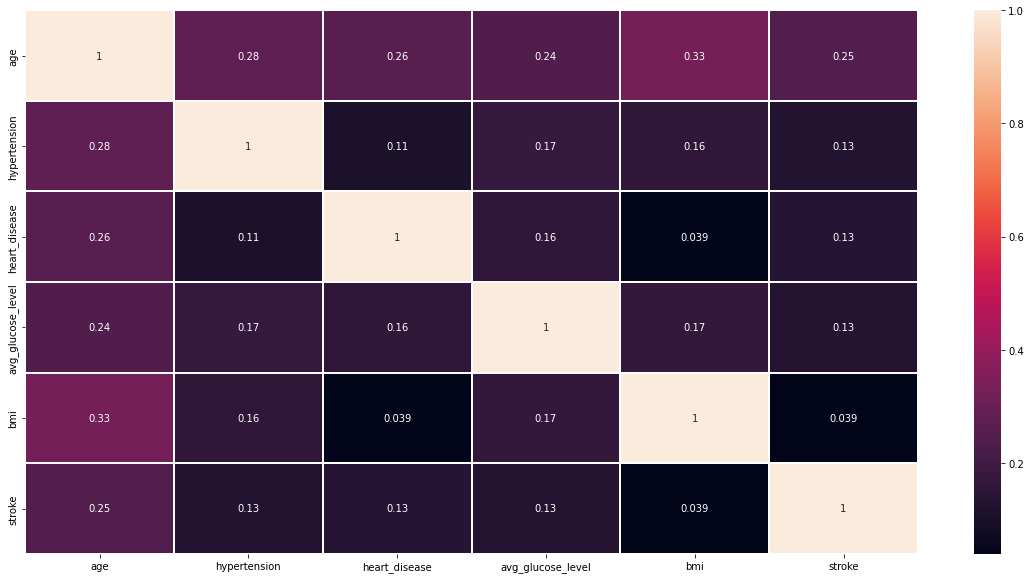

In [ ]:
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

**Observation**

---


There isn't a correlation between different features, except for the **age** variable that is *slightly correlated* with all the other variables.


---




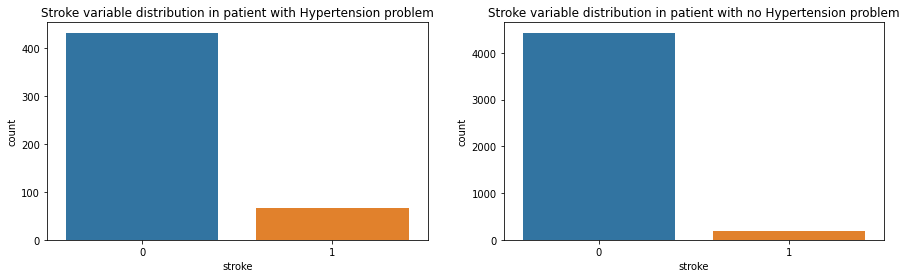

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

sns.countplot(ax=ax[0], data=data[data.hypertension == 1], x='stroke')
sns.countplot(ax=ax[1], data=data[data.hypertension == 0], x='stroke')

ax[0].set_title("Stroke variable distribution in patient with Hypertension problem")
ax[1].set_title("Stroke variable distribution in patient with no Hypertension problem")
plt.show()

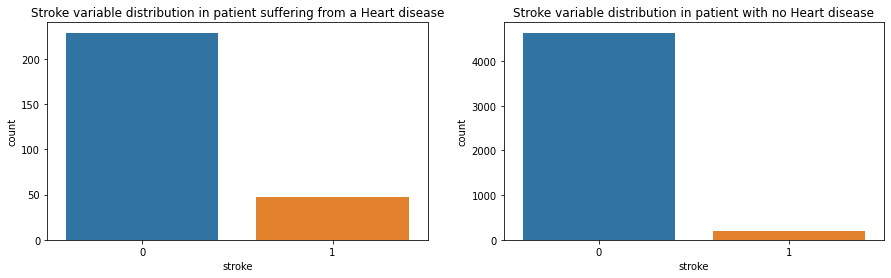

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

sns.countplot(ax=ax[0], data=data[data.heart_disease == 1], x='stroke')
sns.countplot(ax=ax[1], data=data[data.heart_disease == 0], x='stroke')

ax[0].set_title("Stroke variable distribution in patient suffering from a Heart disease")
ax[1].set_title("Stroke variable distribution in patient with no Heart disease")
plt.show()

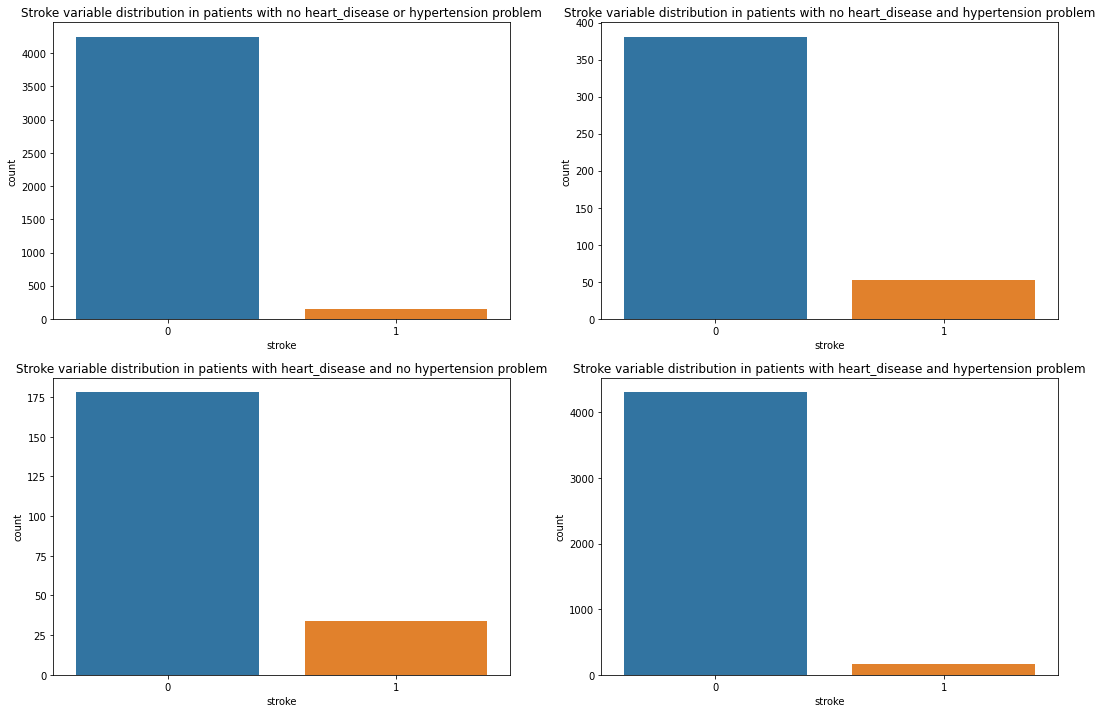

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(18,12))

sns.countplot(ax=ax[0,0], data=data[(data.heart_disease == 0) & (data.hypertension == 0)], x='stroke')
ax[0,0].set_title("Stroke variable distribution in patients with no heart_disease or hypertension problem")

sns.countplot(ax=ax[0,1], data=data[(data.heart_disease == 0) & (data.hypertension == 1)], x='stroke')
ax[0,1].set_title("Stroke variable distribution in patients with no heart_disease and hypertension problem")

sns.countplot(ax=ax[1,0], data=data[(data.heart_disease == 1) & (data.hypertension == 0)], x='stroke')
ax[1,0].set_title("Stroke variable distribution in patients with heart_disease and no hypertension problem")

sns.countplot(ax=ax[1,1], data=data[data.heart_disease == 1 & (data.hypertension == 1)], x='stroke')
ax[1,1].set_title("Stroke variable distribution in patients with heart_disease and hypertension problem")

plt.show()

**Observation**

---


The risk of having a stroke increases when having a hypertension problem or a heart disease


---




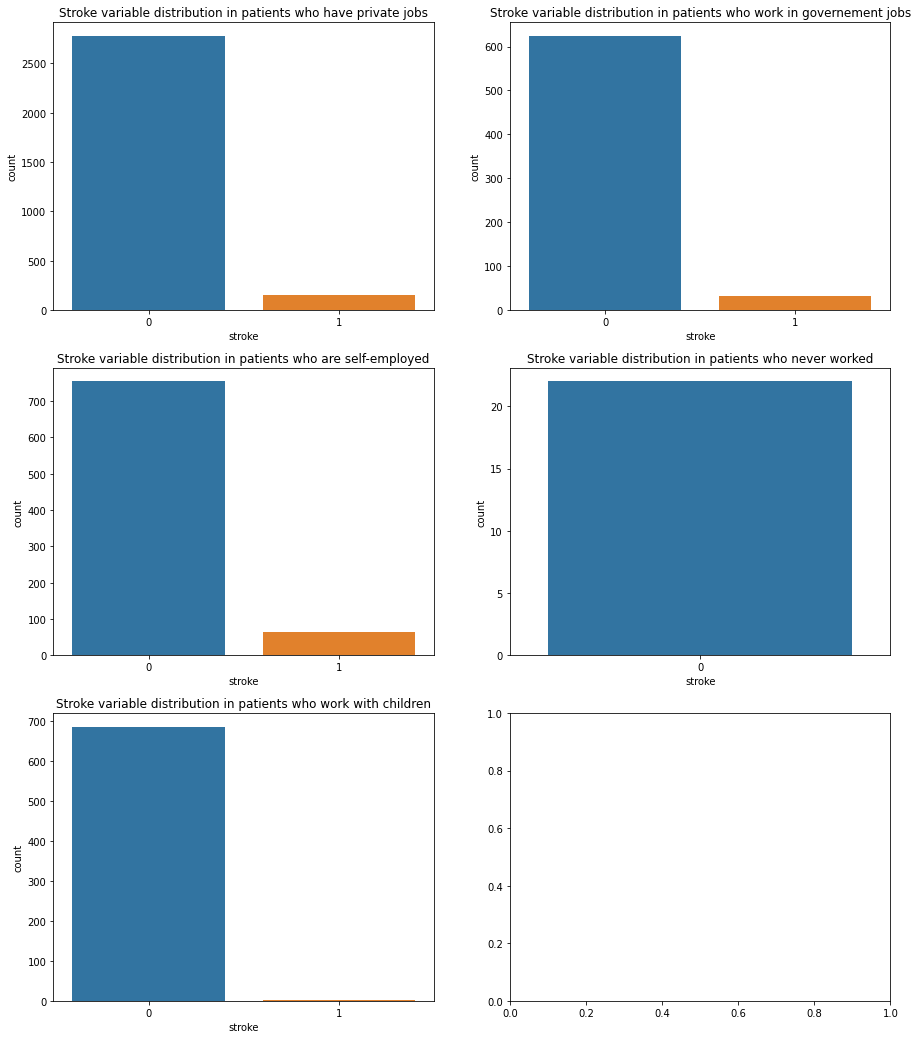

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(15,18))

sns.countplot(ax=ax[0,0], data=data[data.work_type== 'Private'], x='stroke')
ax[0,0].set_title("Stroke variable distribution in patients who have private jobs")
sns.countplot(ax=ax[0,1], data=data[data.work_type == 'Govt_job'], x='stroke')
ax[0,1].set_title("Stroke variable distribution in patients who work in governement jobs")
sns.countplot(ax=ax[1,0], data=data[data.work_type == 'Self-employed'], x='stroke')
ax[1,0].set_title("Stroke variable distribution in patients who are self-employed")
sns.countplot(ax=ax[1,1], data=data[data.work_type == 'Never_worked'], x='stroke')
ax[1,1].set_title("Stroke variable distribution in patients who never worked")
sns.countplot(ax=ax[2,0], data=data[data.work_type == 'children'], x='stroke')
ax[2,0].set_title("Stroke variable distribution in patients who work with children")

plt.show()

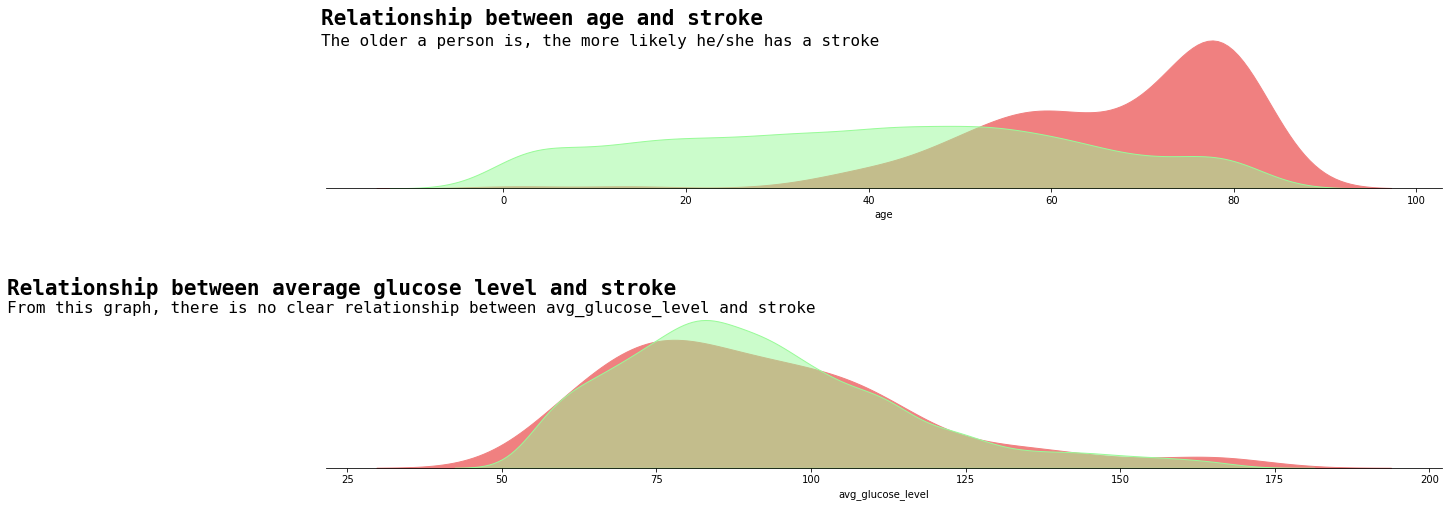

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=data[data.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5) 


sns.kdeplot(data=data[data.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

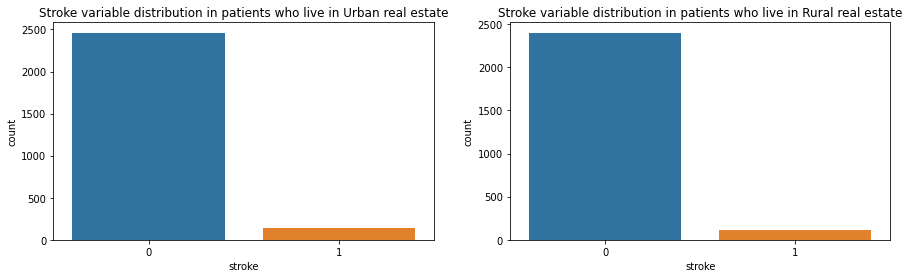

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

sns.countplot(ax=ax[0], data=data[data.Residence_type == 'Urban'], x='stroke')
ax[0].set_title("Stroke variable distribution in patients who live in Urban real estate")
sns.countplot(ax=ax[1], data=data[data.Residence_type == 'Rural'], x='stroke')
ax[1].set_title("Stroke variable distribution in patients who live in Rural real estate")

plt.show()

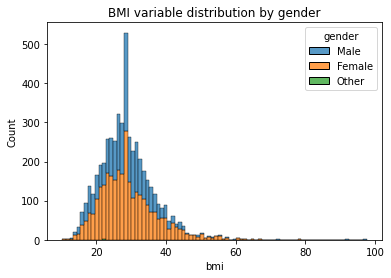

In [ ]:
sns.histplot(data=data, x='bmi', hue='gender', multiple='stack')
plt.title("BMI variable distribution by gender")
plt.show()

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women


What is normal BMI?



1.   If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
2.   If your BMI is 25.0 to 29.9, it falls within the overweight range.
3.   If your BMI is 30.0 or higher, it falls within the obese range.

**Observation**

---


Most of the studied population have a BMI that falls in the overweight range


---

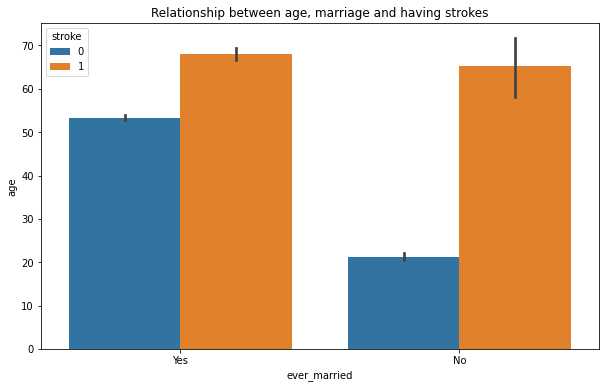

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='ever_married', y='age', hue='stroke')
plt.title("Relationship between age, marriage and having strokes")
plt.show()

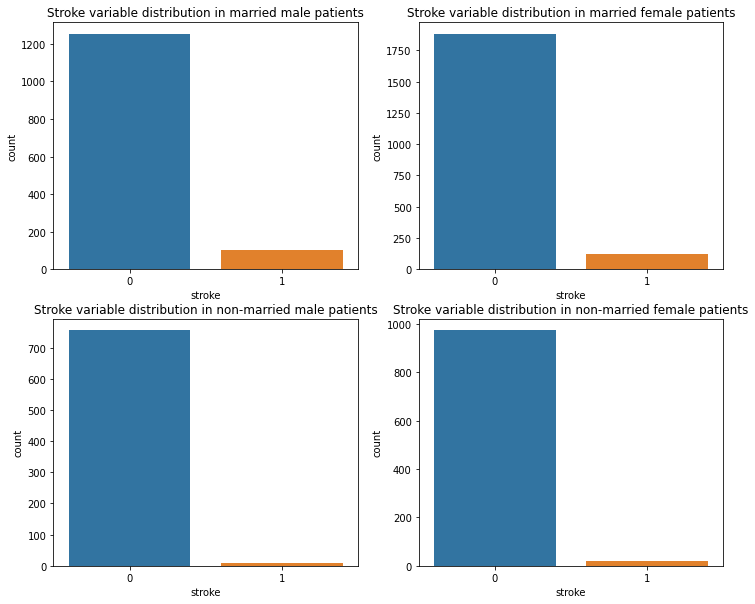

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.countplot(ax=ax[0,0], data=data[(data.ever_married == 'Yes') & (data.gender == 'Male')],
              x='stroke')
ax[0,0].set_title("Stroke variable distribution in married male patients")

sns.countplot(ax=ax[0,1], data=data[(data.ever_married == 'Yes') & (data.gender == 'Female')],
              x='stroke')
ax[0,1].set_title("Stroke variable distribution in married female patients")

sns.countplot(ax=ax[1,0], data=data[(data.ever_married == 'No') & (data.gender == 'Male')],
              x='stroke')
ax[1,0].set_title("Stroke variable distribution in non-married male patients")

sns.countplot(ax=ax[1,1], data=data[(data.ever_married == 'No') & (data.gender == 'Female')],
              x='stroke')
ax[1,1].set_title("Stroke variable distribution in non-married female patients")
plt.show()

**Observation**

---


Percentage of getting a stroke in married patients is slightly higher than in non-married patients


---


## **4.   Label Encoding**

In [10]:
enc=LabelEncoder()

gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender


In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# **Model Building**

**Split the data using stratified strategy**

In [ ]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10, stratify=Y) 

**Standardize the data**

In [ ]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

**Train DecisionTree classifier**

In [ ]:
dt=DecisionTreeClassifier(class_weight="balanced")
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
Y_pred=dt.predict(X_test_std)

ac_dt=accuracy_score(Y_test,Y_pred)
pr_dt=precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f" Decision Tree:\n \tAccuracy: {ac_dt*100}\n \tPrecision: {pr_dt*100}\n \tRecall: {recall*100}")

 Decision Tree:
 	Accuracy: 90.8023483365949
 	Precision: 5.555555555555555
 	Recall: 3.225806451612903


**Train Random Forest Classifier**

In [ ]:
forst = RandomForestClassifier(class_weight="balanced")
forst.fit(X_train_std, Y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
Y_pred=forst.predict(X_test_std)

ac =accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f" Random Forest Classifier:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

 Random Forest Classifier:
 	Accuracy: 93.73776908023484
 	Precision: 0.0
 	Recall: 0.0


**Train Logistic Regression Classifier**

In [ ]:
lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train_std,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
Y_pred =lr.predict(X_test_std)
ac =accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f" Logistic Regression Classifier:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

 Logistic Regression Classifier:
 	Accuracy: 74.85322896281801
 	Precision: 16.02787456445993
 	Recall: 74.19354838709677


**MLP Classifier**

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(5, 2), max_iter=500, random_state=1)
clf.fit(X_train_std,Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=1)

In [ ]:
Y_pred = clf.predict(X_test_std)

ac _MLP=accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f"MLP Classifier:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

MLP Classifier:
 	Accuracy: 93.9334637964775
 	Precision: 0.0
 	Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observation**

---

Despite the accuracy is good in all models, however only the DecisionTree classifier and logistic regression models were able to predict the positive class. 

As a conclusion we can say that balancing the weights of the target variable with the inverse of their frequency didn't solve the problem of imbalanced data (setting class_weight="balanced" in the models definition). Thus we will try in the next section to upsample the minority class to solve this problem.


---

## **Resampling data**

In [ ]:
# Separate majority and minority classes
df_majority = data[data.stroke==0]
df_minority = data[data.stroke==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=4861,    # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

**Split the data using stratified strategy**

In [ ]:
X=df_upsampled.drop('stroke',axis=1)
Y=df_upsampled['stroke']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
Y_train.value_counts()

1    3911
0    3866
Name: stroke, dtype: int64

**Standardization**

In [ ]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

**Decision Tree Classifier**

In [ ]:
dt=DecisionTreeClassifier(class_weight="balanced")
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
Y_pred=dt.predict(X_test_std)

ac_dt=accuracy_score(Y_test,Y_pred)
pr_dt=precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f" Decision Tree:\n \tAccuracy: {ac_dt*100}\n \tPrecision: {pr_dt*100}\n \tRecall: {recall*100}")

 Decision Tree:
 	Accuracy: 97.37789203084833
 	Precision: 94.9050949050949
 	Recall: 100.0


**Random Forest Classifier**

In [ ]:
forst = RandomForestClassifier(class_weight="balanced")
forst.fit(X_train_std, Y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
Y_pred=forst.predict(X_test_std)

ac =accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f" Random Forest Classifier:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

 Random Forest Classifier:
 	Accuracy: 99.33161953727506
 	Precision: 98.65005192107996
 	Recall: 100.0


**Logistic Regression**

In [ ]:
lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train_std,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
Y_pred=lr.predict(X_test_std) 

ac =accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f"Logistic Regression:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

Logistic Regression:
 	Accuracy: 76.4026402640264
 	Precision: 76.62337662337663
 	Recall: 79.72972972972973


**MLP Classifier**

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(5, 2), max_iter=500, random_state=1)
clf.fit(X_train_std,Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=1)

In [ ]:
Y_pred=clf.predict(X_test_std)

ac =accuracy_score(Y_test,Y_pred)
pr =precision_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f"MLP Classifier:\n \tAccuracy: {ac*100}\n \tPrecision: {pr*100}\n \tRecall: {recall*100}")

MLP Classifier:
 	Accuracy: 80.20565552699229
 	Precision: 76.6258246936852
 	Recall: 85.57894736842105


**Save the model**

- Since Random forest was the best classifier we choosed to save it

In [ ]:
import os

# create repository for models if it doesn't exist
models_path = './models/'

if not os.path.exists(models_path):
  os.makedirs(models_path)

# save the model to disk
filename = models_path+'random_forest_clf.sav'
joblib.dump(forst, filename)

['./models/random_forest_clf.sav']

**Save the standard Scaler**

In [ ]:
# create repository for models if it doesn't exist
models_path = './models/'

if not os.path.exists(models_path):
  os.makedirs(models_path)

joblib.dump(std, models_path+'std_scaler.bin', compress=True)
joblib.dump(enc, models_path+'label_enc.bin', compress=True)

['./models/label_enc.bin']

**Load the model and make some predictions**

In [ ]:
models_path = './models/'
filename = models_path+'random_forest_clf.sav'

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
# Load the standard scaler
loaded_std = joblib.load(models_path+"std_scaler.bin")
# Load the encoder
loaded_enc = joblib.load(models_path+"label_enc.bin")

In [ ]:
entry = [["Male", 80, 0, 1, "Yes", "Private", "Urban", 228.29, 36.0, "formerly smoked"]]
col = ["gender","age","hypertension","heart_disease",
               "ever_married","work_type",
               "Residence_type","avg_glucose_level","bmi",
               "smoking_status"]
entry = pd.DataFrame(columns=col, data=entry)

In [ ]:
entry

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80,0,1,Yes,Private,Urban,228.29,36.0,formerly smoked


In [ ]:
gender=loaded_enc.fit_transform(entry['gender'])
smoking_status=loaded_enc.fit_transform(entry['smoking_status'])
work_type=loaded_enc.fit_transform(entry['work_type'])
Residence_type=loaded_enc.fit_transform(entry['Residence_type'])
ever_married=loaded_enc.fit_transform(entry['ever_married'])

entry['work_type']=work_type
entry['ever_married']=ever_married
entry['Residence_type']=Residence_type
entry['smoking_status']=smoking_status
entry['gender']=gender

In [ ]:
test = loaded_std.transform(entry)

In [ ]:
loaded_model.predict(test)

array([1])

In [ ]:
proba = loaded_model.predict_proba(test)

In [ ]:
proba[0][1] # proba of getting a stroke

0.51

In [ ]:
proba[0][0] # proba of not getting a stroke

0.49